In [57]:
import pandas as pd
from numpy import arange
import codecs

In [55]:
textgridName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/phonTimelineSorted.csv"
debitName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/phonTimeline-Debit.csv"
textgridFile=open(textgridName,"r")
textgrid=textgridFile.readlines()

In [11]:
voyelles=["a","e","i","y","u","eh","oh","eu","on","an","swa"]

In [12]:
timing=[]
for ligne in textgrid[1:]:
    timing.append(ligne.strip().split(","))

In [13]:
#timeLine=pd.DataFrame(index=[float(i)/100 for i in range(6500000)],columns=["début","fin","V1","V2","V3"])
timeLine=pd.DataFrame(columns=["début","fin","V1","V2","V3"])

In [ ]:
for ligne in timing:
    debut=int(float(ligne[0])*100)
#    debut=float(ligne[0])*100//20*20/100
#    debut=int(float(ligne[0]))
#    print debut,
    if ligne[2] in voyelles:
        if ligne[3]=="spk1":
            timeLine.loc[debut]=[ligne[0],ligne[1],ligne[2],None,None]
        elif ligne[3]=="spk2":
            timeLine.loc[debut]=[ligne[0],ligne[1],None,ligne[2],None]
        elif ligne[3]=="spk3":
            timeLine.loc[debut]=[ligne[0],ligne[1],None,None,ligne[2]]

In [41]:
len(timeLine[timeLine.index<3400][timeLine[timeLine.index<3400].index>3300])

7

In [64]:
def adapte(valeur):
    return float(valeur*100)

In [ ]:
%%time
debits={}
demiFenetres=[0.25,0.5,0.75,1,1.5,2,2.5,3]
increment=min(min(demiFenetres)*2,1)
for demiFenetre in demiFenetres:
    debits[demiFenetre]={}
    demiFen=adapte(demiFenetre)
    debut=adapte(30)
    fin=adapte(6000)
    step=adapte(increment)
    for i in arange(debut,fin,step):
        nbVoyelles=len(timeLine[timeLine.index<=i+demiFen][timeLine[timeLine.index<=i+demiFen].index>=i-demiFen])
        debits[demiFenetre][float(i)/100]=float(nbVoyelles)/(2*demiFen/100)

In [106]:
debits

{0.25: {30.5: 0.0,
  31.5: 0.0,
  111.5: 4.0,
  884.5: 8.0,
  5463.0: 8.0,
  3438.5: 4.0,
  1684.5: 4.0,
  30.0: 0.0,
  31.0: 0.0,
  32.0: 0.0,
  33.0: 2.0,
  34.0: 8.0,
  35.0: 6.0,
  36.0: 8.0,
  37.0: 2.0,
  38.0: 6.0,
  39.0: 2.0,
  40.0: 0.0,
  41.0: 10.0,
  42.0: 0.0,
  43.0: 4.0,
  44.0: 4.0,
  45.0: 0.0,
  46.0: 6.0,
  47.0: 0.0,
  48.0: 4.0,
  49.0: 0.0,
  50.0: 2.0,
  51.0: 0.0,
  52.0: 8.0,
  53.0: 2.0,
  54.0: 4.0,
  55.0: 4.0,
  56.0: 2.0,
  57.0: 4.0,
  58.0: 2.0,
  59.0: 4.0,
  60.0: 0.0,
  61.0: 2.0,
  62.0: 0.0,
  63.0: 0.0,
  64.0: 0.0,
  65.0: 6.0,
  66.0: 2.0,
  67.0: 2.0,
  68.0: 4.0,
  69.0: 0.0,
  70.0: 0.0,
  71.0: 0.0,
  72.0: 0.0,
  73.0: 8.0,
  74.0: 8.0,
  75.0: 0.0,
  76.0: 6.0,
  77.0: 6.0,
  78.0: 0.0,
  79.0: 0.0,
  80.0: 4.0,
  81.0: 6.0,
  82.0: 2.0,
  83.0: 4.0,
  84.0: 4.0,
  85.0: 4.0,
  86.0: 6.0,
  87.0: 4.0,
  88.0: 4.0,
  89.0: 0.0,
  90.0: 6.0,
  91.0: 4.0,
  92.0: 6.0,
  93.0: 2.0,
  94.0: 8.0,
  95.0: 6.0,
  96.0: 0.0,
  97.0: 4.0,
  98.0: 2.

In [143]:
%%time
timeDebits=pd.DataFrame(columns=["%.2f"%i for i in demiFenetres])
resultats={}
elementCle=debits.keys()[0]
for elementTime in sorted(debits[elementCle]):
    if elementTime < 6000:
        ligneResultat=[]
        for debit in sorted(debits):
            ligneResultat.append(debits[debit][elementTime])
        resultats[elementTime]=ligneResultat
        timeDebits.loc[adapte(elementTime)]=ligneResultat

CPU times: user 21.3 s, sys: 637 ms, total: 21.9 s
Wall time: 21.9 s


In [144]:
timeDebits

,0.25,0.50,0.75,1.00,1.50,2.00,2.50,3.00
3000,0,0,0.000000,0.0,0.000000,0.00,0.0,0.000000
3050,0,0,0.000000,0.0,0.000000,0.00,0.0,0.333333
3100,0,0,0.000000,0.0,0.000000,0.00,0.4,1.166667
3150,0,0,0.000000,0.0,0.000000,0.50,1.4,1.833333
3200,0,0,0.000000,0.0,0.666667,1.75,2.2,2.166667
3250,0,0,0.666667,1.0,2.333333,2.75,2.6,2.833333
3300,2,2,3.333333,3.5,3.666667,3.25,3.4,3.333333
3350,8,7,6.000000,5.5,4.333333,4.25,4.0,3.833333
3400,8,9,8.000000,6.5,5.666667,5.00,4.6,4.000000
3450,8,6,6.666667,7.5,6.666667,5.75,4.8,4.500000


In [135]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

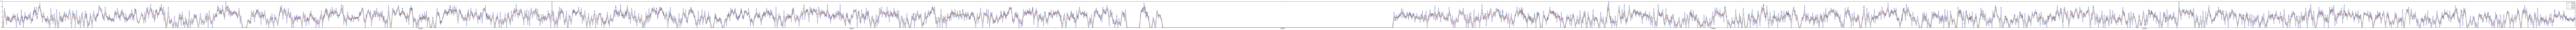

In [148]:
timeDebits[["1.00","2.00","3.00"]].plot(figsize=(400, 4))

In [107]:
with codecs.open(debitName.replace(".csv","-Total"+".csv"),"w",encoding="utf8") as output:
    output.write("time;%s"%";".join(["%.2f"%i for i in demiFenetres])+"\n")
    for element in sorted(resultats):       
        output.write("%.3f;%s"%(element,";".join(["%.1f"%i for i in resultats[element]]))+"\n")
